# 4  Value Decomposition

Value decomposition is 
$$
\frac {\partial V}{\partial x}(X_0) \cdot M_0  =   {\mathbb E} \left[ \int_0^\infty  Dis_t \left(M_t \cdot Scf_t \right)  \mid X_0, M_0 \right]
$$

where
$$
Dis_t = \exp\left( - \int_0^t \left[\delta +  \sum_{\ell=1}^{L}  {\mathcal J}^{\ell}(X_u)   \right]du \right)$$

$$\begin{align*}  
Scf_t  =  \delta U_x(X_t) 
 & + \sum_{\ell=1}^{L} {\mathcal J}^{\ell}_x(X_t) g^{\ell*}(X_t)  \left[V^\ell(X_t)  - V(X_t)  \right]  \cr
& +  \sum_{\ell=1}^{L}  {\mathcal J}^{\ell}(X_t) g^{\ell*}(X_t)   V^\ell_x(X_t)  \cr & +  \xi \sum_{\ell = 1}^L 
{\mathcal J}^\ell_x(X_t)  \left[ 1 - g^{\ell*}(X_t)   + g^{\ell*}(X_t)  \log g^{\ell*} (X_t) \right].  
\end{align*}$$

There are two steps to do value decomposition:

1. [Simulate](https://github.com/korito1416/two-capital-climate-change/blob/main/python/FeymannKacs_simulate.py) state variable processes and first variation processes.

2. Calculated four terms of discounted social cash flow. 


## 4.1 Simulate First Variational Process and State Variables


FeymannKacs_prepare.sh and FeymannKacs_simulate.sh are two main bash files.

[FeymannKacs_prepare.py](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_prepare.py) loads solutions from solved HJB equations, computes related variables in state space, calculate derivatives via finite difference and interpolate them.

[FeymannKacs_simulate.py](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_simulate.py#L193)
simulates the first variational process, the distorted state variables and other terms needed in value decomposition. 

The first variational process and distorted state variable process are  
$$ 
M_t=
 \begin{bmatrix} 
 M_t^{ \log \tilde{ {K}}} \cr  
 M_t^{\tilde{Y}} \cr  
 M_t^{\log\tilde{{R}}} \cr  
 M_t^{\log\tilde{{N}}}  
\end{bmatrix},\quad
\tilde{X}_t=
 \begin{bmatrix} 
 \log \tilde{ {K}}_t \cr  
 \tilde{Y}_t \cr  
 \log\tilde{{R}}_t \cr  
 \log\tilde{{N}}_t  
\end{bmatrix}$$
For notation clarification, we using $\log{K}  $ instead of $\hat{K} $ in this section.

To simulate the first variational process with respect to technology, we set the initial value of $M_t$ to be $[0,0,1,0]'$, and $\tilde{X}_t$ to be $[log(\frac{85}{0.115}), 1.1, log(11.2),1.1 \gamma_1  + 0.5\times 1.1^2\gamma_2 ]'$. Initial values are set in code line [905](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_simulate.py#L905).


We use $M^{\log \tilde{ {K}}_t}$ as an example and others are the same. 
The implied evolution of the process $M^{\log \tilde{ {K}}_t}$ is given by
$$dM_{t}^{\log \tilde{ {K}}_t} = \left(M_t\right)'\frac{\partial \mu_{\log \tilde{ {K}}_t}}{\partial \tilde{x}}(\tilde{X}_t) dt + \left({M_t}\right)'\frac{\partial \sigma_{\log \tilde{ {K}}_t}}{\partial \tilde{x}}(\tilde{X}_t) dW_t$$
, where $\tilde{X}_t$ are distorted state variables. 

Recall that the distorted Capital evoluation is 
$$d \log \tilde{ K}_t =   \left( - \mu_k    + \frac {I_{t}^k}{\tilde{K}_t}  -{\frac { \kappa} 2} \left( {\frac {I_{t} ^k} {\tilde{K}_t}} \right)^2  + h_{\tilde{K}} + \frac{\sigma_k^2}{2} \right) dt +  \sigma_k  dW_t$$
where $\sigma_{\log \tilde{ {K}}_t} = \sigma_k$ and $\mu_{\log \tilde{ {K}}_t}$

$$\mu_{\log \tilde{ {K}}_t} = - \mu_k    + \frac {I_{t}^k}{\tilde{K}_t}  -{\frac { \kappa} 2} \left( {\frac {I_{t} ^k} {\tilde{K}_t}} \right)^2  + h_{\tilde{K}} + \frac{\sigma_k^2}{2}$$

$$ \frac{\partial \mu_{\log \tilde{ {K}}_t}}{\partial \tilde{x}} =
 \begin{bmatrix} 
 \frac{\partial \mu_{\log \tilde{ {K}}_t}}{\partial \log \tilde{ {K}}_t}\cr  
 \frac{\partial \mu_{\log \tilde{ {K}}_t}}{\partial \tilde{Y}_t } \cr  
\frac{\partial \mu_{\log \tilde{ {K}}_t}}{\partial \log\tilde{{R}}_t} \cr  
\frac{\partial \mu_{\log \tilde{ {K}}_t}}{\partial \log\tilde{{N}}_t} 
\end{bmatrix}, \quad
\frac{\partial \sigma_{\log \tilde{ {K}}_t}}{\partial \tilde{x}} = 0
  $$
Line [303](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_prepare.py#L303) shows how we calculate those derivatives by finite differnece.  

Line [397](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_simulate.py#L397) interpolates the vectors from finite difference to get the functions. 

Then we start the for [loop](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_simulate.py#L727) from time 0 to recursively get four discounted term. 

## 4.2 Calculate four value decomposition terms

Besides above variables, the derivatives we need  in value decomposition are
$$\frac{\partial U}{\partial x} ,  \frac{\partial {\mathcal J}^{\ell}}{\partial x}   ,  \frac{\partial {  V^\ell} }{\partial x}$$ 
 

We use finite difference and interpolation same as above. Line [313](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/python/FeymannKacs_simulate.py#L313) shows how we code it. Now we have every element in value decomposition.

We also consider four different configurations of uncertainty aversion as a way to assess the different economic forces in play:

- a. pre-jump neutrality - post-jump neutrality;
- b. pre-jump neutrality - post-jump aversion;
- c. pre-jump aversion - post-jump neutrality;
- d. pre-jump aversion - post-jump aversion.

[FeymannKacs_simulate_NewPlug.sh](https://github.com/korito1416/two-capital-climate-change/blob/306b1c5ee51eb6ad24e6267fe0d2b82ad5286e98/conduction/FeymannKacs_simulate_NewPlug.sh#L23) controls different $\xi$ for different channels. 

## 4.3 Expected Marginal Social Payoffs for Alternative Horizons

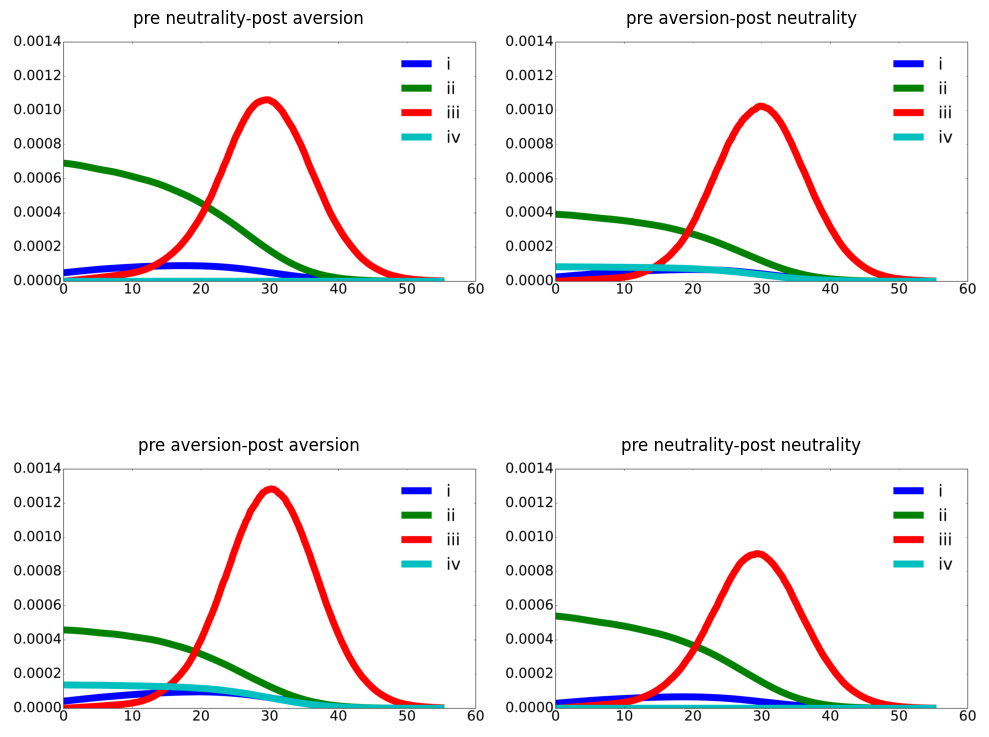

In [2]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# List of PDF paths
pdf_files = [
    'additional/Aversion IntensityPre Neutrality Post Less AversionTechnology0.083_Discount_Term1234_dt2.pdf',
    'additional/Aversion IntensityPre Less Aversion Post NeutralityTechnology0.083_Discount_Term1234_dt2.pdf',
    'additional/Aversion IntensityPre Less Aversion Post Less AversionTechnology0.083_Discount_Term1234_dt2.pdf',
    'additional/Aversion IntensityPre Neutrality Post NeutralityTechnology0.083_Discount_Term1234_dt2.pdf'
]

# Convert each PDF to image
images = [convert_from_path(pdf, first_page=0, last_page=1)[0] for pdf in pdf_files]

# Plot the images in a 2x2 grid using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display each image in the grid
captions = [
    'pre neutrality-post aversion', 
    'pre aversion-post neutrality', 
    'pre aversion-post aversion', 
    'pre neutrality-post neutrality'
]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')  # Turn off axis
    ax.set_title(captions[i])

# Adjust layout for spacing between images and titles
plt.tight_layout()
plt.show()
